### Construcción de un árbol de decisión con variables independientes binarias

In [1]:
import pandas as pd

df = pd.read_csv("heart_disease.csv", delimiter=";")
df


,Chest_pain,Good_Blood_Circulation,Blocked_Arteries,Heart_Disease
0,No,Yes,No,No
1,No,Yes,No,No
2,Yes,Yes,No,No
3,Yes,Yes,No,No
4,Yes,Yes,No,No
5,Yes,Yes,No,No
6,Yes,No,No,No
7,Yes,No,No,Yes
8,No,Yes,Yes,Yes
9,No,No,Yes,Yes


In [2]:
def gini(y):
    p = y.value_counts(normalize=True)
    return 1 - (p ** 2).sum()


In [3]:
def split_gini(df, feature, target):
    left = df[df[feature] == "Yes"]
    right = df[df[feature] == "No"]
    
    n = len(df)
    return (
        len(left) / n * gini(left[target]) +
        len(right) / n * gini(right[target])
    )


In [4]:
def best_split(df, features, target):
    best_feature = None
    best_gini = float("inf")
    
    for f in features:
        g = split_gini(df, f, target)
        print("Gini ponderado", f, g)
        if g < best_gini:
            best_gini = g
            best_feature = f
    
    print("Best feature", best_feature)
    return best_feature, best_gini


In [5]:
def build_tree(df, features, target, depth=0, max_depth=3):
    # caso base
    if df[target].nunique() == 1 or not features or depth == max_depth:
        return {
            "type": "leaf",
            "prediction": df[target].value_counts().idxmax(),
            "samples": len(df)
        }
    
    feature, g = best_split(df, features, target)
    
    left = df[df[feature] == "Yes"]
    right = df[df[feature] == "No"]
    
    remaining = [f for f in features if f != feature]
    
    return {
        "type": "node",
        "feature": feature,
        "gini": round(g, 3),
        "yes": build_tree(left, remaining, target, depth + 1),
        "no": build_tree(right, remaining, target, depth + 1)
    }


In [6]:
def print_tree(tree, indent=""):
    if tree["type"] == "leaf":
        print(f"{indent}→ Predict {tree['prediction']} (n={tree['samples']})")
        return
    
    print(f"{indent}{tree['feature']} = Yes?")
    print(f"{indent}├─ Yes")
    print_tree(tree["yes"], indent + "│   ")
    print(f"{indent}└─ No")
    print_tree(tree["no"], indent + "    ")


In [7]:
target = "Heart_Disease"
features = ["Chest_pain", "Good_Blood_Circulation", "Blocked_Arteries"]

tree = build_tree(df, features, target)
print_tree(tree)


Gini ponderado Chest_pain 0.49350649350649367
Gini ponderado Good_Blood_Circulation 0.475
Gini ponderado Blocked_Arteries 0.25
Best feature Blocked_Arteries
Gini ponderado Chest_pain 0.3333333333333333
Gini ponderado Good_Blood_Circulation 0.3428571428571429
Best feature Chest_pain
Gini ponderado Good_Blood_Circulation 0.3999999999999999
Best feature Good_Blood_Circulation
Blocked_Arteries = Yes?
├─ Yes
│   → Predict Yes (n=6)
└─ No
    Chest_pain = Yes?
    ├─ Yes
    │   Good_Blood_Circulation = Yes?
    │   ├─ Yes
    │   │   → Predict No (n=5)
    │   └─ No
    │       → Predict No (n=4)
    └─ No
        → Predict No (n=3)


### Con scikit-learn


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
df = pd.read_csv("heart_disease.csv", delimiter=";")
df

,Chest_pain,Good_Blood_Circulation,Blocked_Arteries,Heart_Disease
0,No,Yes,No,No
1,No,Yes,No,No
2,Yes,Yes,No,No
3,Yes,Yes,No,No
4,Yes,Yes,No,No
5,Yes,Yes,No,No
6,Yes,No,No,No
7,Yes,No,No,Yes
8,No,Yes,Yes,Yes
9,No,No,Yes,Yes


In [10]:
df = df.replace({"Yes": 1, "No": 0})

X = df.drop("Heart_Disease", axis=1)
y = df["Heart_Disease"]

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15424\3925073366.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Yes": 1, "No": 0})


In [11]:
tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
)

tree.fit(X, y)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
# Profundidad
print("Profundidad", tree.get_depth())

# Número de hojas
print("Número de hojas", tree.get_n_leaves())

Profundidad 3
Número de hojas 4


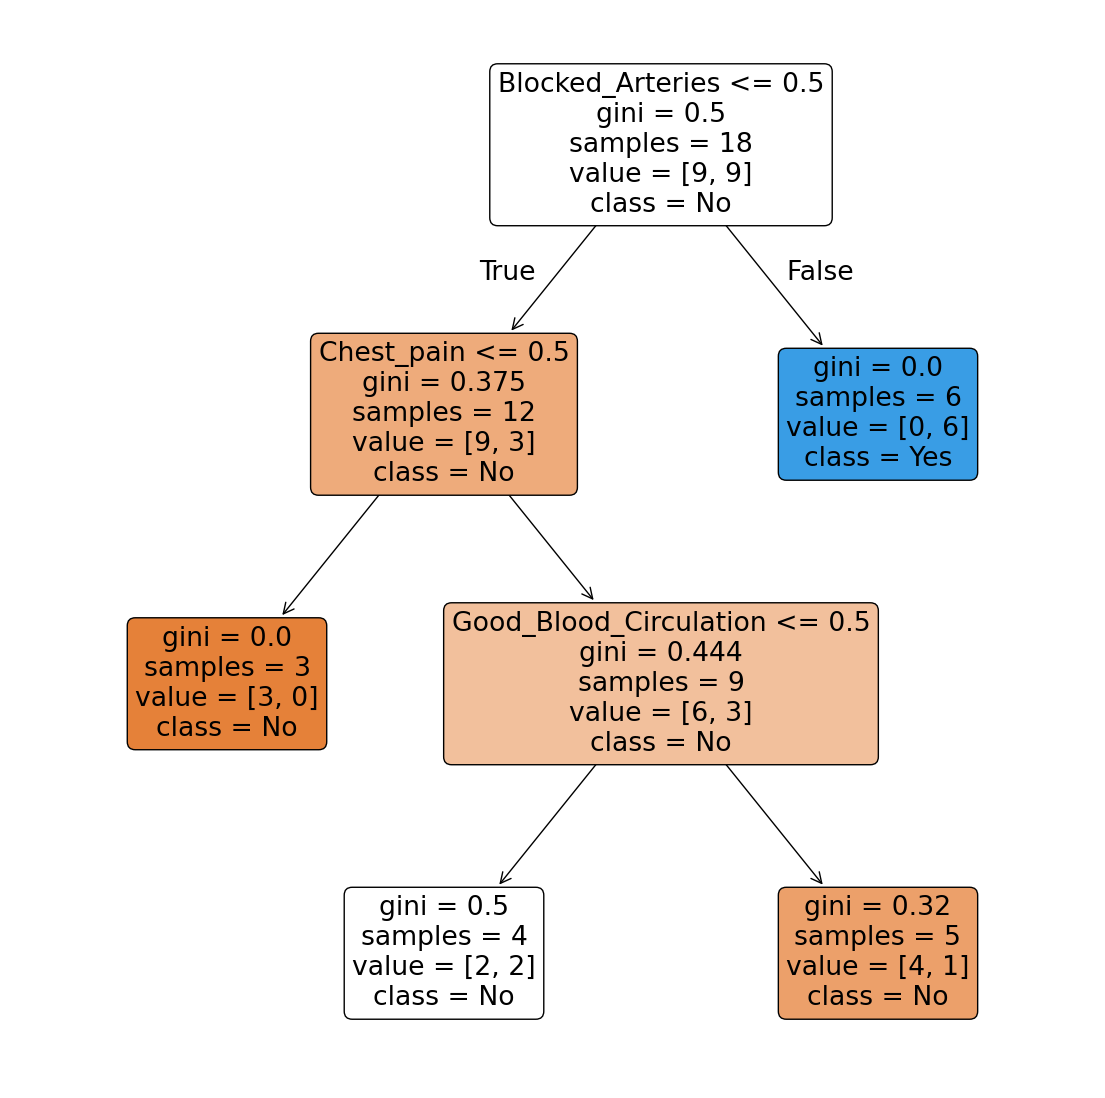

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

def plot_decision_tree(tree, X):
    plt.figure(figsize=(14, 14))
    plot_tree(
        tree,
        feature_names=X.columns,
        class_names=["No", "Yes"],
        filled=True,
        rounded=True
    )
    plt.show()

plot_decision_tree(tree, X)


### Comparación Gini vs Entropy

In [14]:
tree = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=3
)

tree.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


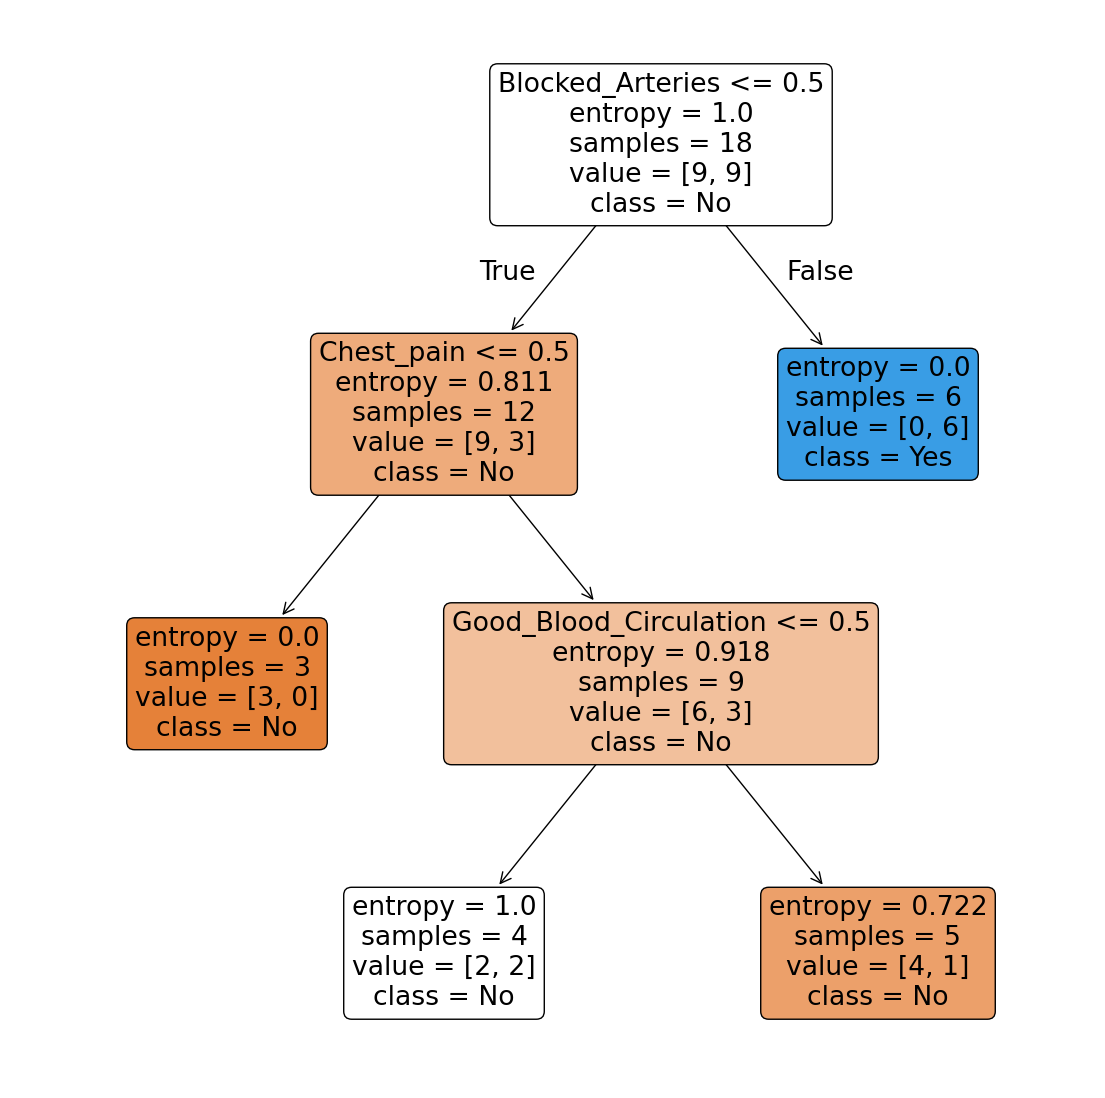

In [15]:
plot_decision_tree(tree, X)

### Mismo Gini

In [16]:
df = pd.read_csv("heart_disease.csv", delimiter=";")

In [17]:
df.loc[7, "Good_Blood_Circulation"] = "Yes"
df.loc[16, "Good_Blood_Circulation"] = "Yes"

In [18]:
X = df.drop("Heart_Disease", axis=1)
y = df["Heart_Disease"]

In [19]:
target = "Heart_Disease"
features = ["Chest_pain", "Good_Blood_Circulation", "Blocked_Arteries"]

tree = build_tree(df, features, target)
print_tree(tree)

Gini ponderado Chest_pain 0.49350649350649367
Gini ponderado Good_Blood_Circulation 0.5
Gini ponderado Blocked_Arteries 0.25
Best feature Blocked_Arteries
Gini ponderado Chest_pain 0.3333333333333333
Gini ponderado Good_Blood_Circulation 0.3333333333333333
Best feature Chest_pain
Gini ponderado Good_Blood_Circulation 0.38095238095238104
Best feature Good_Blood_Circulation
Blocked_Arteries = Yes?
├─ Yes
│   → Predict Yes (n=6)
└─ No
    Chest_pain = Yes?
    ├─ Yes
    │   Good_Blood_Circulation = Yes?
    │   ├─ Yes
    │   │   → Predict No (n=7)
    │   └─ No
    │       → Predict No (n=2)
    └─ No
        → Predict No (n=3)


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_15424\934792080.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({"Yes": 1, "No": 0})


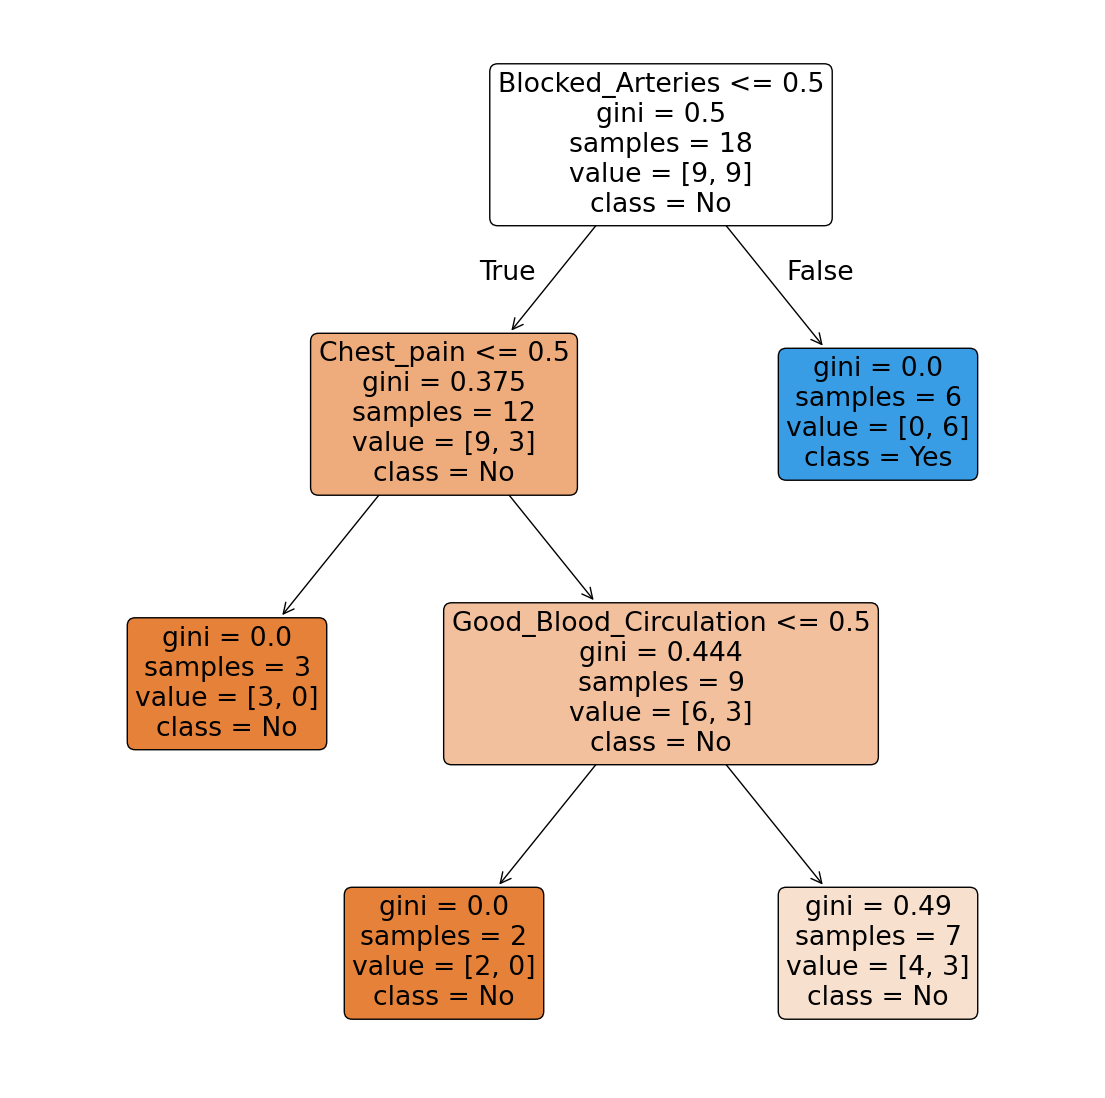

In [20]:
df = df.replace({"Yes": 1, "No": 0})

X = df.drop("Heart_Disease", axis=1)
y = df["Heart_Disease"]

tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    random_state=1
)

tree.fit(X, y)

plot_decision_tree(tree, X)

¿Por qué se elige Good_Blood_Circulation, cuando Good_Blood_Circulation y Chest_Pain tienen el mismo valor de impureza de Gini?

- Prueba a cambiar el orden de las columnas en el DataFrame

In [21]:
df = df[["Good_Blood_Circulation", "Chest_pain", "Blocked_Arteries", "Heart_Disease"]]

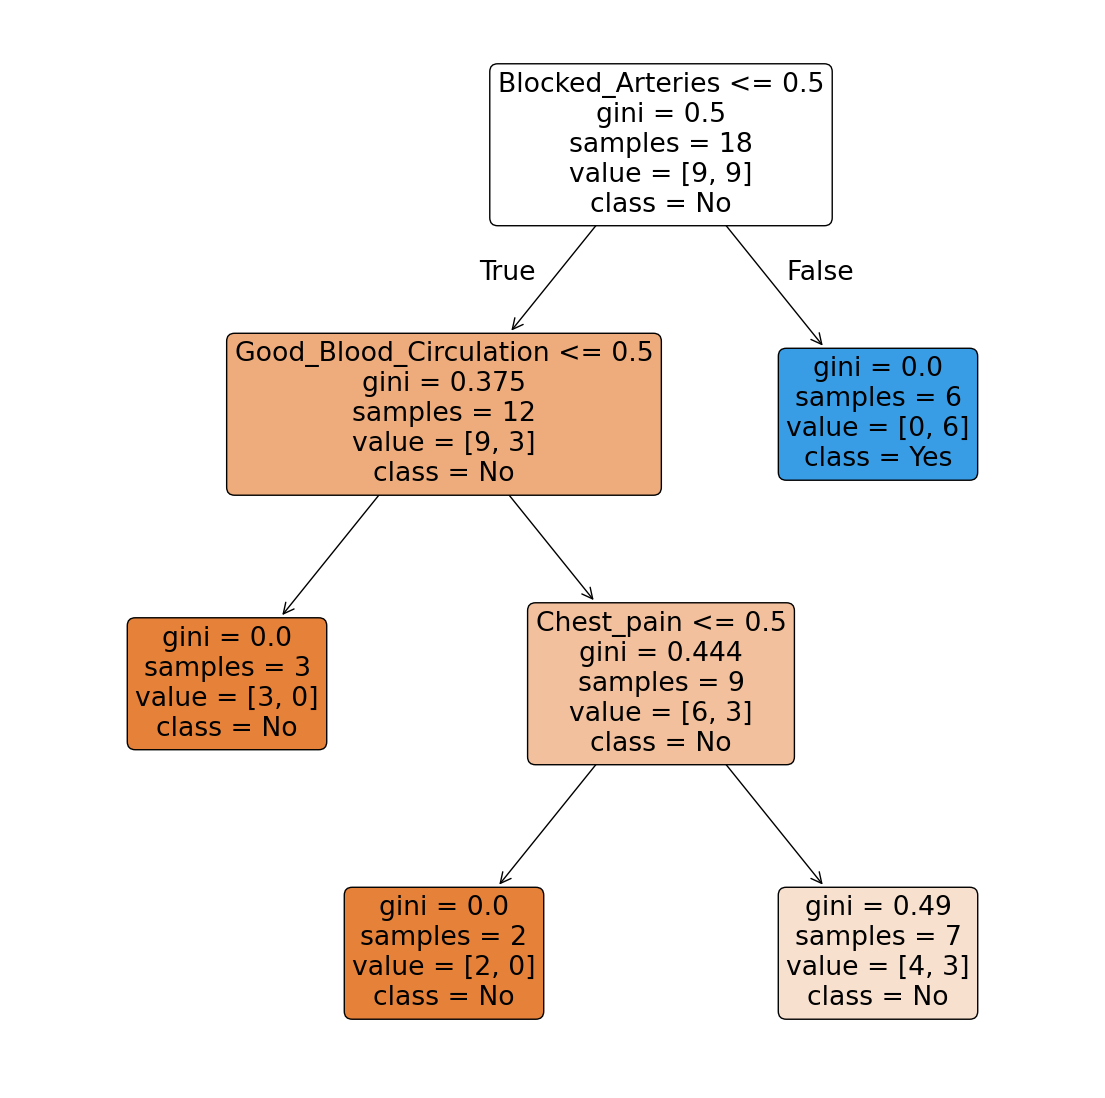

In [22]:
df = df.replace({"Yes": 1, "No": 0})

X = df.drop("Heart_Disease", axis=1)
y = df["Heart_Disease"]

tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,
    random_state=1
)

tree.fit(X, y)

plot_decision_tree(tree, X)